Analyze simulation results

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from light_by_light.laser_test_class import laser_test
from light_by_light.postprocess import SignalAnalyzer
from light_by_light.plotting import plot_mollweide

/home/wi73yus/.conda/envs/lbl/lib/python3.9/site-packages/pyfftw/interfaces/__init__.py:268: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  has_scipy_fft = _LooseVersion(scipy.__version__) >= _LooseVersion('1.4.0')


In [2]:
def get_discernible_area(Nbg, N_angular, theta):
    discernible_area = np.zeros_like(Nbg).astype(int)

    for idx_theta in range(len(theta)):
        idx = N_angular[idx_theta] > Nbg[idx_theta]
        discernible_area[idx_theta,idx] = 1
    return discernible_area
    
def get_discernible_signal(Nbg, N_angular, theta, phi):
    discernible_area = get_discernible_area(Nbg, N_angular, theta)
    dtheta = theta[1] - theta[0]
    dphi = phi[1] - phi[0]

    N_disc = 0
    for i in range(len(theta)):
        for j in range(len(phi)):
            if discernible_area[i,j]:
                N_disc += N_angular[i,j] * np.sin(theta[i])
    N_disc = N_disc * dphi * dtheta
    return N_disc

### Visualize fields

In [58]:
folder = 'runs/gridscan/CCS_w0/laser_1_w0/w0_4'
post_data = np.load(f'{folder}/postprocess_data.npz')

phi = post_data['phi']
theta = post_data['theta']
N_angular = post_data['N_angular']
background = post_data['background']
discernible_area = post_data['discernible_area']
N_total = post_data['N_total']
N_disc = post_data['N_disc']

plot_data = [background, N_angular, discernible_area]
titles = ['background', 'signal', 'discernible area']

print(f'N total: {N_total}')
print(f'N disc: {N_disc}')

ini_file = f'{folder}/vacem.ini'
laser_diagnostics = laser_test(ini_file)
energy = laser_diagnostics.energy()
print(f'Energy: {energy}')

N total: 12.846892942505855
N disc: 1.2272791702701906
Getting Fourier Coefficients...
Setting up the Field Solver...
Calculating E and B field...
Test class is set up.
Energy: 49.32754030597195


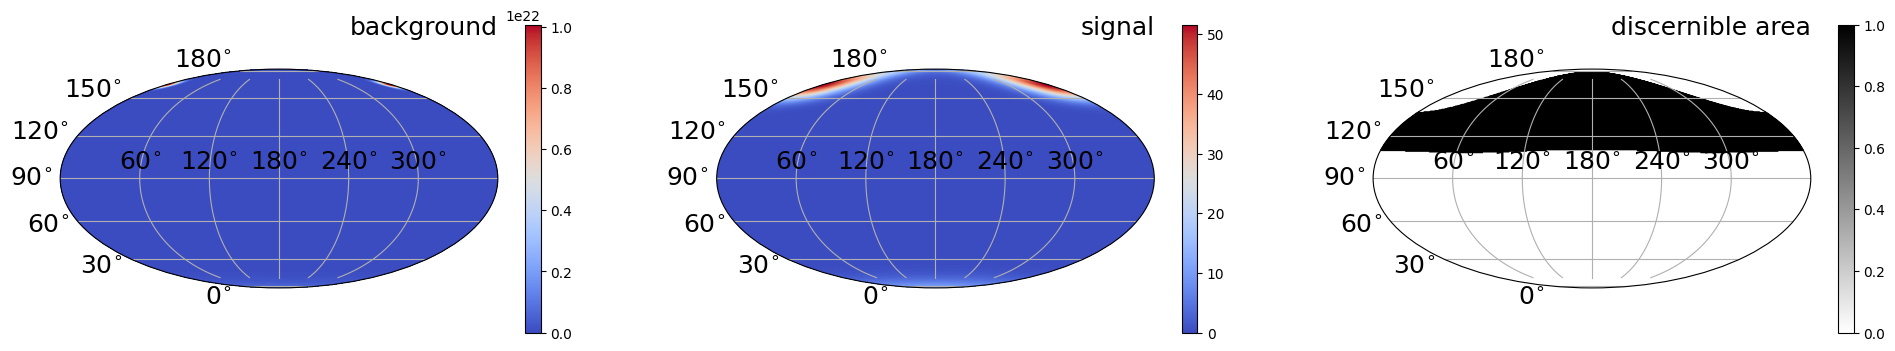

In [59]:
fig = plt.figure(figsize=(24,8))
for i, (data, title) in enumerate(zip(plot_data, titles)):
    cmap = 'binary' if i == 2 else 'coolwarm'
    ax = fig.add_subplot(1,3,i+1, projection='mollweide')
    plot_mollweide(fig, ax, phi, theta,
                   data, cmap=cmap)
    plt.title(title, fontsize=18, loc='right', pad=25)
plt.show()

In [60]:
background_num = laser_diagnostics.photon_number_density()
diff = np.abs(background - background_num.matrix)

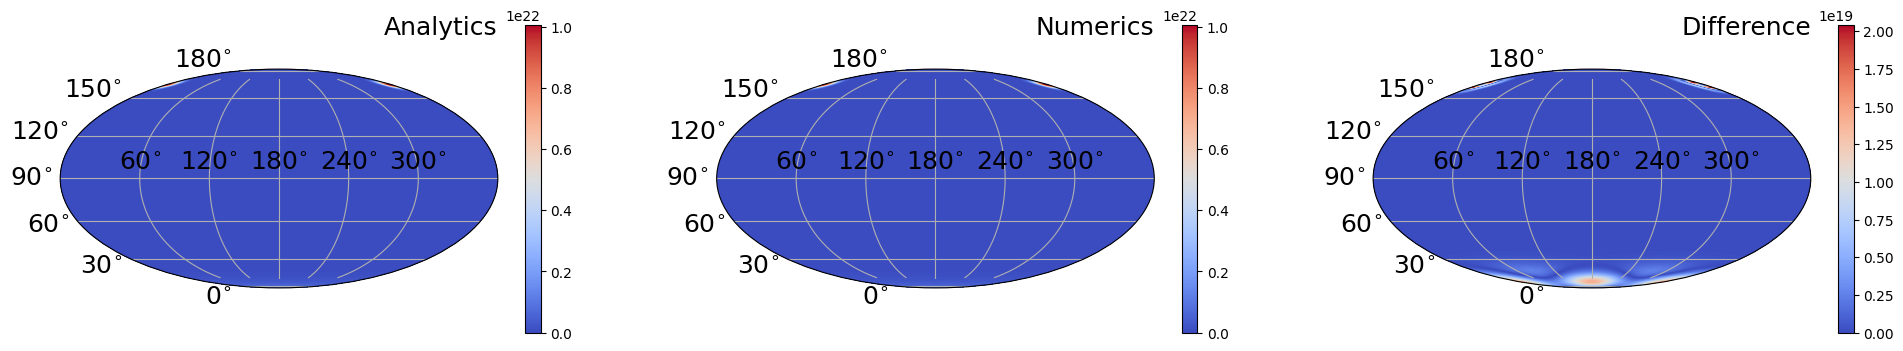

In [61]:
fig = plt.figure(figsize=(24,8))
for i, (data,title) in enumerate(zip([background, background_num, diff],
                                      ['Analytics', 'Numerics', 'Difference'])):
    ax = fig.add_subplot(1,3,i+1, projection='mollweide')
    plot_mollweide(fig, ax, phi, theta,
                   data, cmap='coolwarm')
    plt.title(title, fontsize=18, loc='right', pad=25)
plt.show()

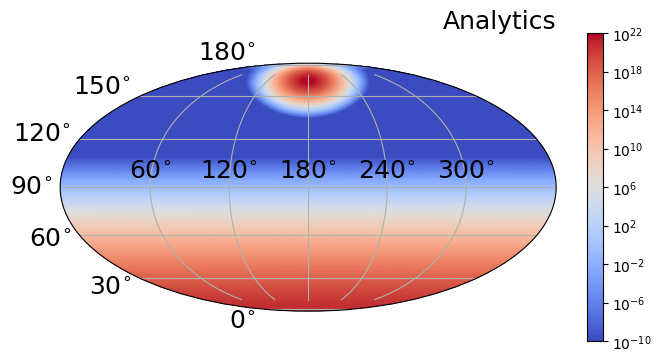

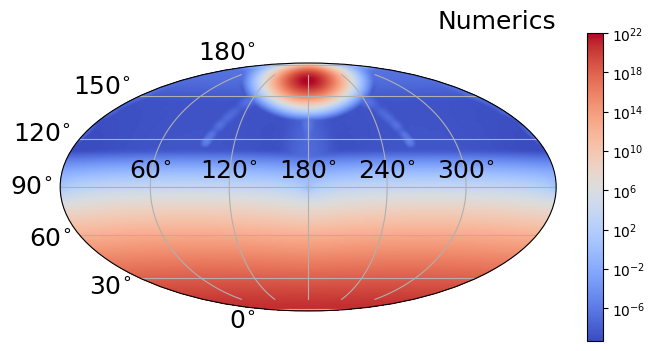

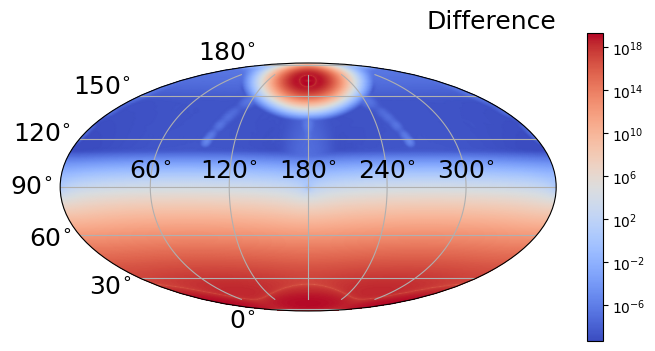

In [62]:
for i, (data,title) in enumerate(zip([background, background_num.matrix, diff],
                                      ['Analytics', 'Numerics', 'Difference'])):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1, projection='mollweide')
    plot_mollweide(fig, ax, phi, theta,
                   np.roll(data, shift=data.shape[1]//2, axis=1),
                   cmap='coolwarm', scale='log')
    plt.title(title, fontsize=18, loc='right', pad=25)
    plt.show()

In [64]:
discernible_area_num = get_discernible_area(background_num.matrix, N_angular, theta)
N_disc_num = get_discernible_signal(background_num.matrix, N_angular,
                                    theta, phi)

In [65]:
print(f'N disc (the): {N_disc}')
print(f'N disc (num): {N_disc_num}')

N disc (the): 1.2272791702701906
N disc (num): 0.8756167577932694


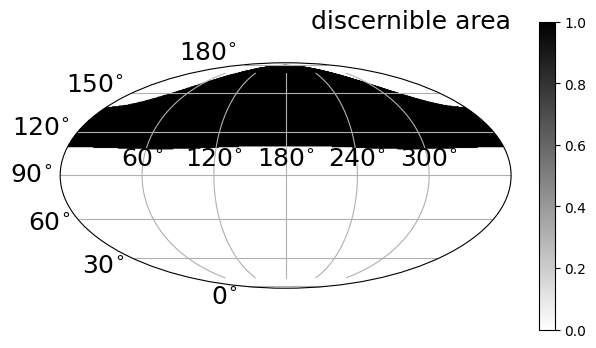

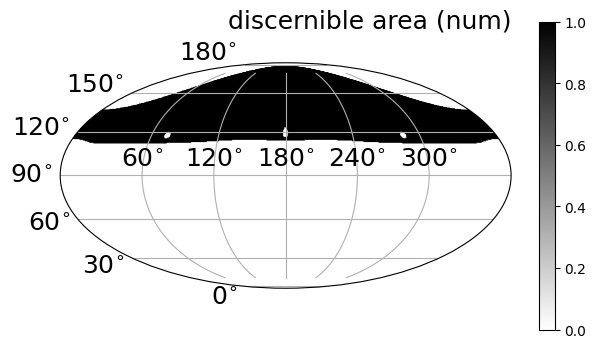

In [66]:
for i, (data,title) in enumerate(zip([discernible_area, discernible_area_num],
                                     ['discernible area', 'discernible area (num)'])):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1,2,1, projection='mollweide')
    plot_mollweide(fig, ax, phi, theta, data,
                   cmap='binary')
    plt.title(title, fontsize=18, loc='right', pad=25)
    plt.show()

### Circular cross section: variable w0

In [7]:
w0_arr = np.linspace(1,8,8,endpoint=True,dtype=int)
N_total_arr, N_disc_arr, N_disc_num_arr = [np.zeros(8) for i in range(3)]

====================== w0 = 1 =============================
N total: 175.52765831066503
N disc: 0.0
Calculating E and B field...
Energy: 48.73450996709959


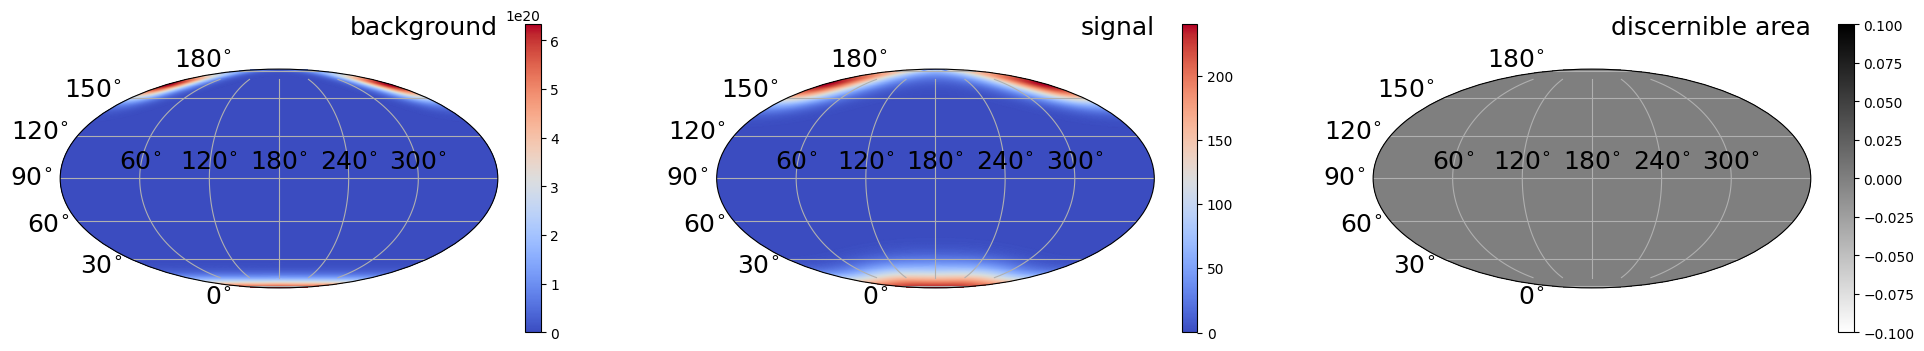

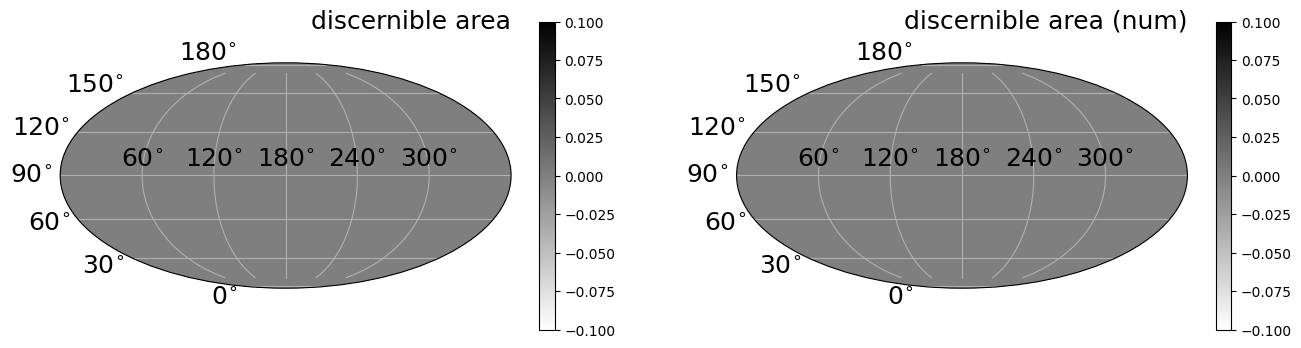

====================== w0 = 2 =============================
N total: 55.10555847312546
N disc: 0.015983294168776342
Calculating E and B field...
Energy: 49.20844629928426


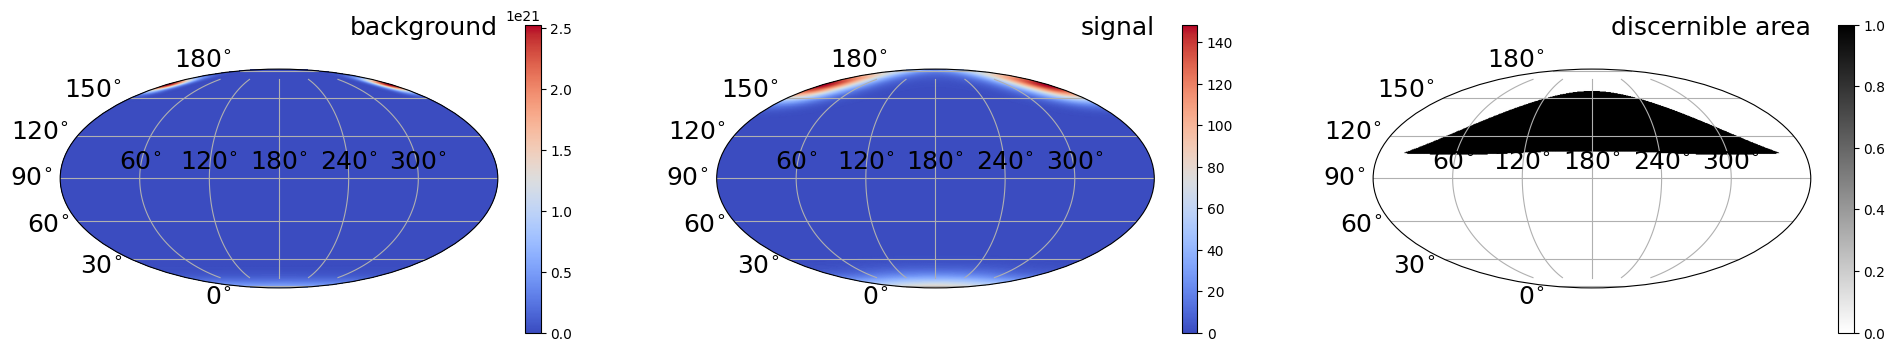

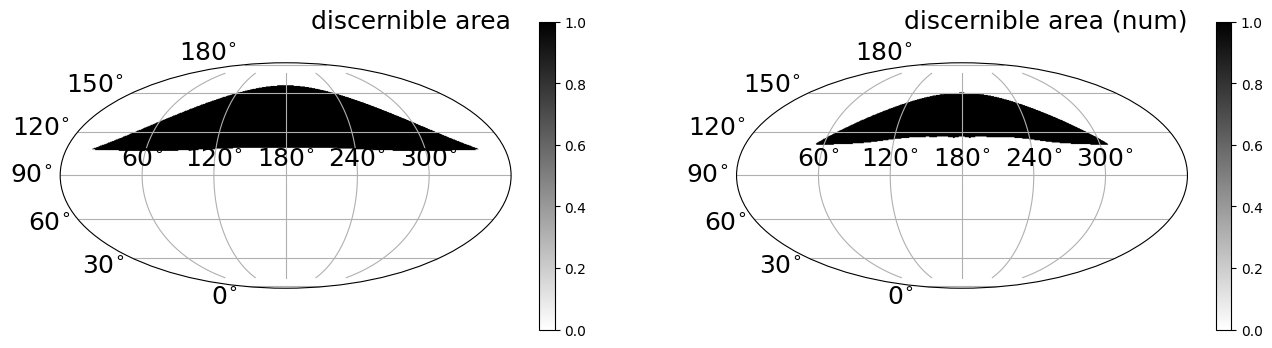

====================== w0 = 3 =============================
N total: 23.720560135027707
N disc: 0.4904376990590939
Calculating E and B field...
Energy: 49.29665504077593


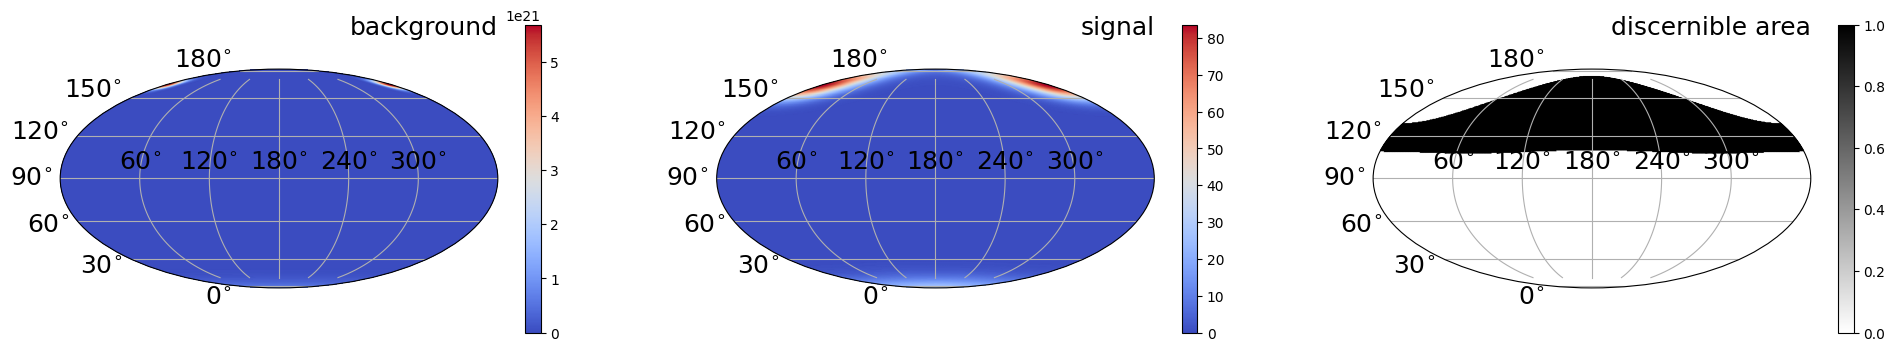

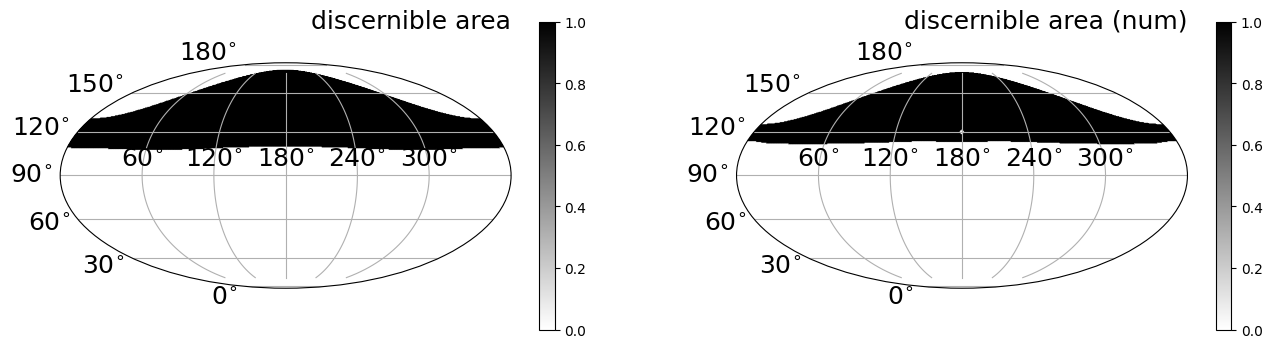

====================== w0 = 4 =============================
N total: 12.846892942505855
N disc: 1.2272791702701906
Calculating E and B field...
Energy: 49.32754030597195


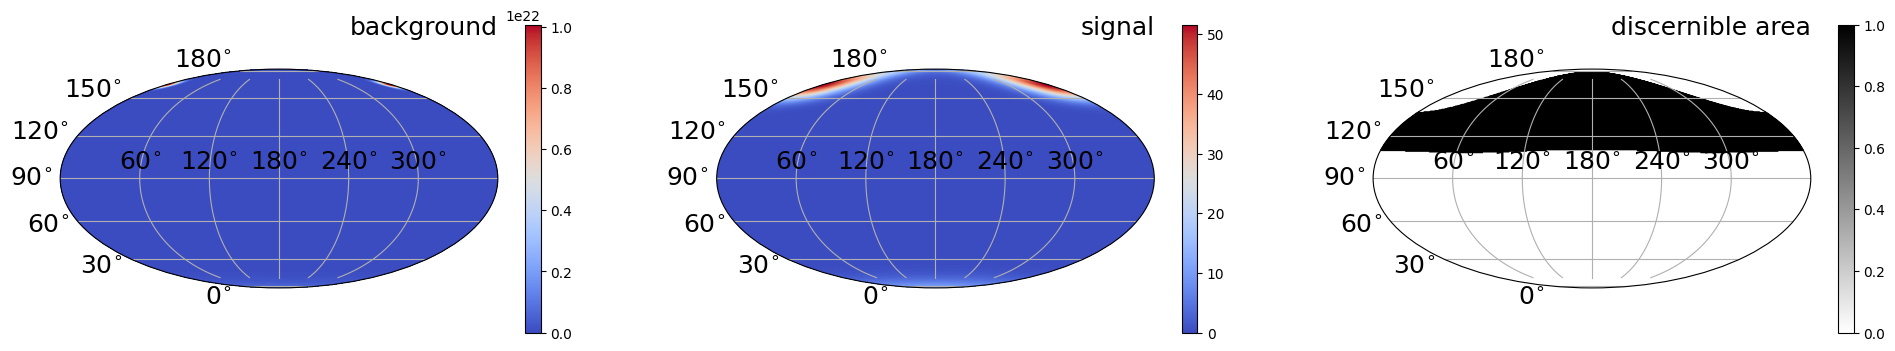

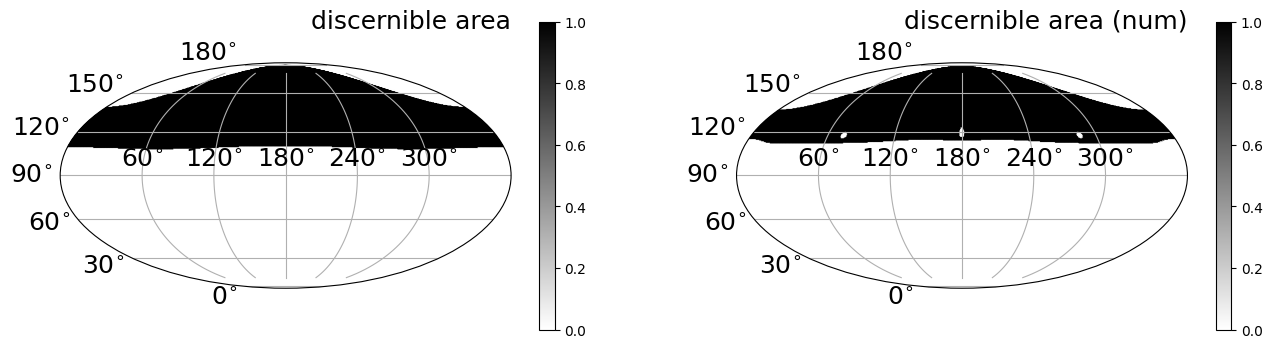

====================== w0 = 5 =============================
N total: 8.00122895404571
N disc: 1.6515809564342605
Calculating E and B field...
Energy: 49.34183709222752


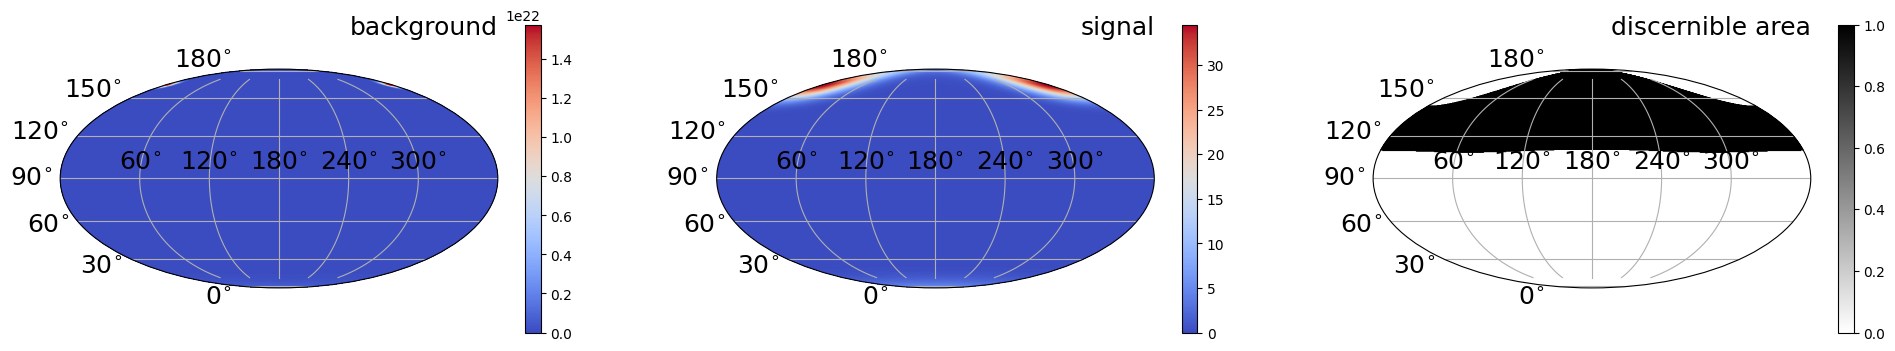

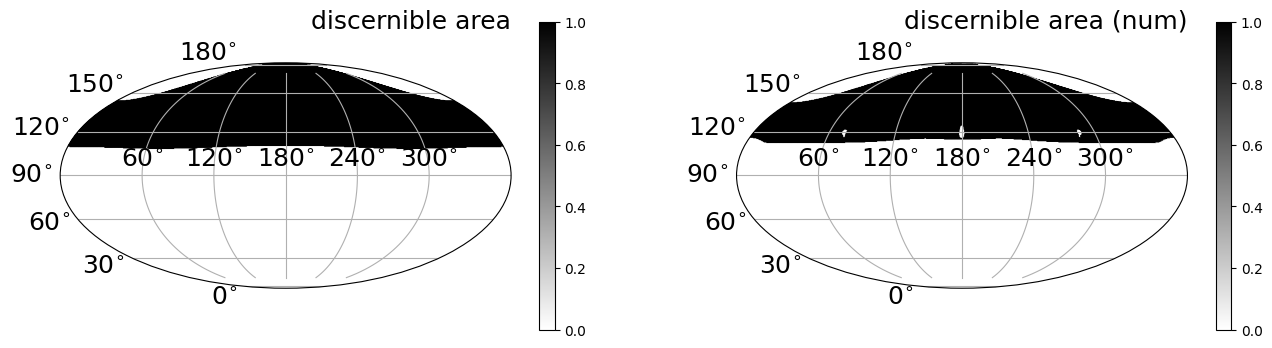

====================== w0 = 6 =============================
N total: 5.456123591559371
N disc: 1.7588920205606593
Calculating E and B field...
Energy: 49.34960351131089


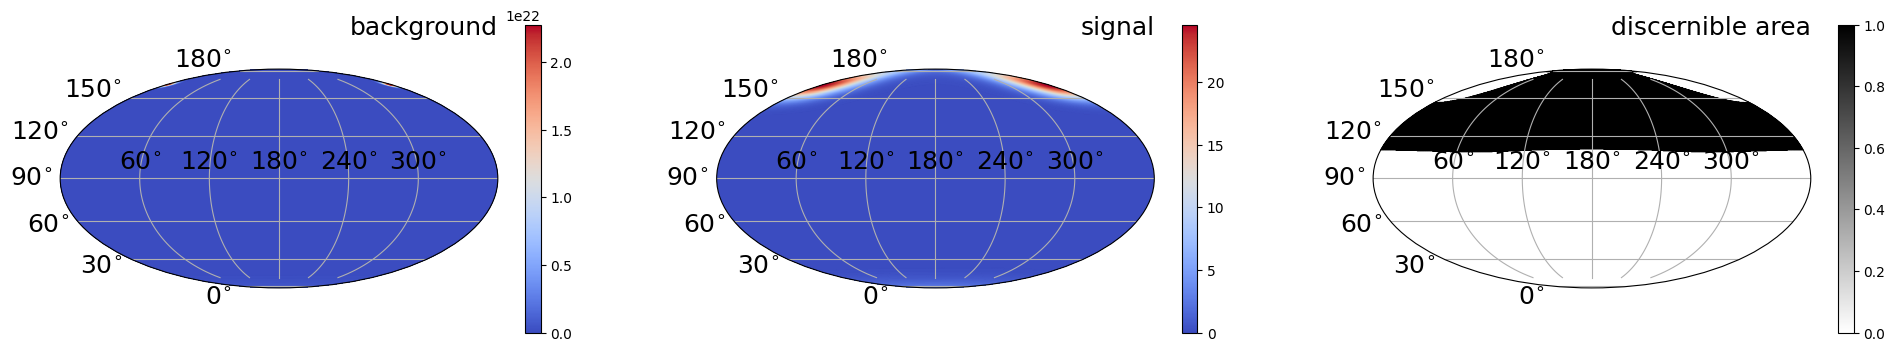

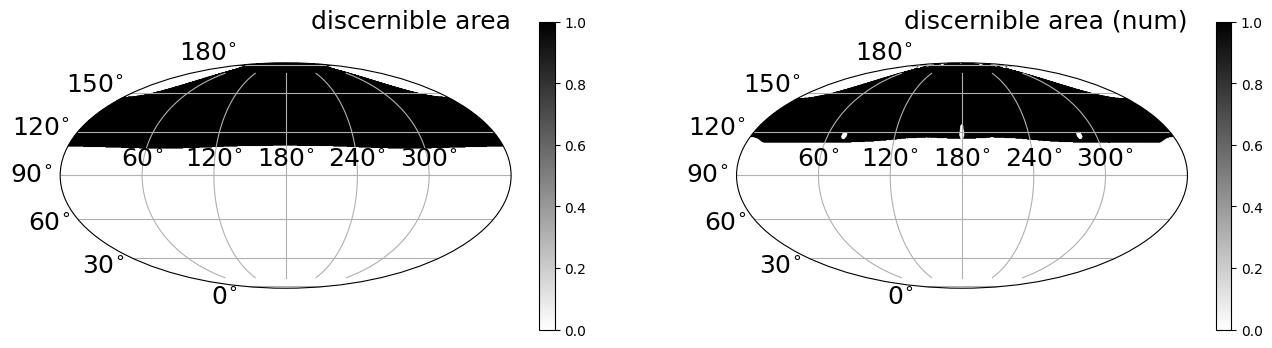

====================== w0 = 7 =============================
N total: 3.9591162825947834
N disc: 1.689892628501213
Calculating E and B field...
Energy: 49.35428649183966


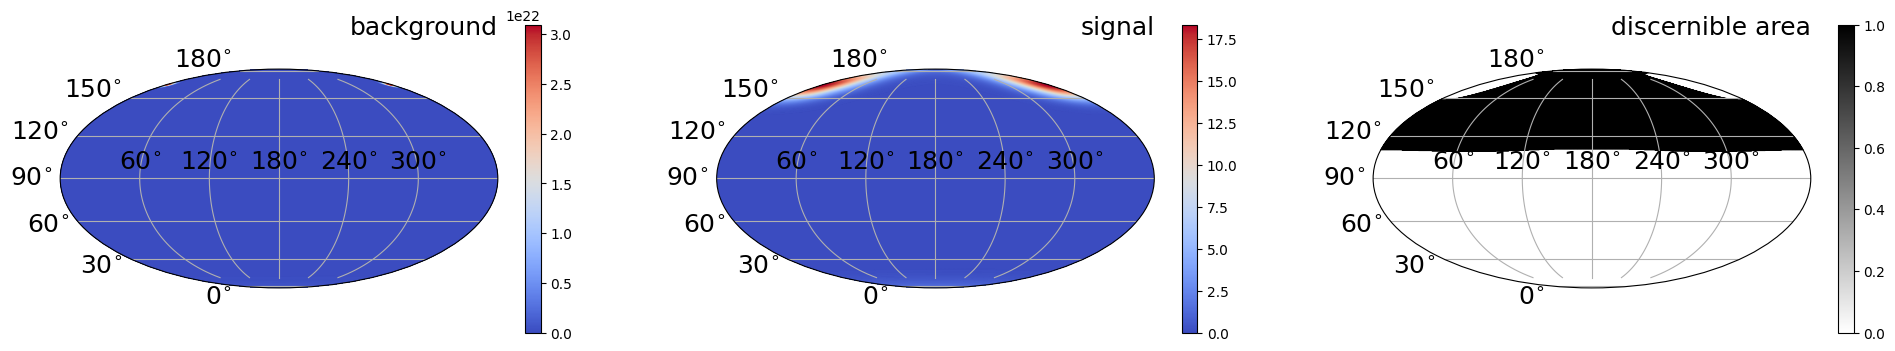

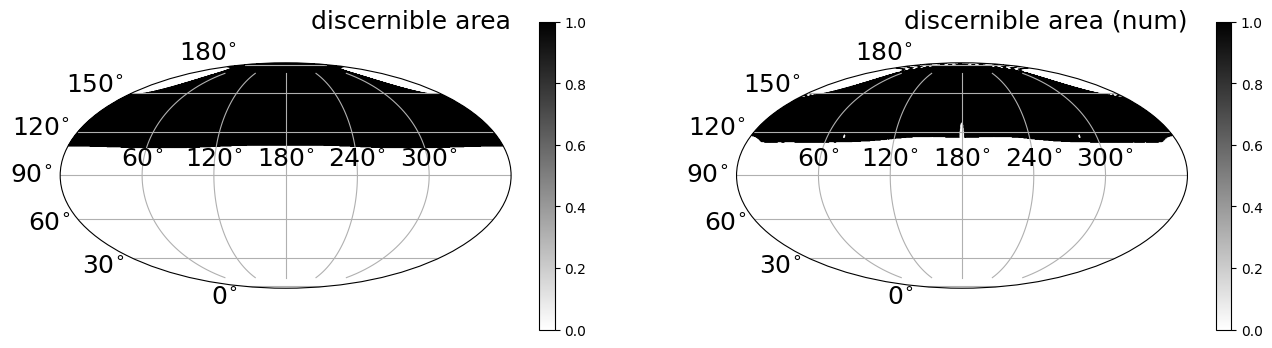

====================== w0 = 8 =============================
N total: 3.004911185277992
N disc: 1.5479925186310266
Calculating E and B field...
Energy: 49.35732595294986


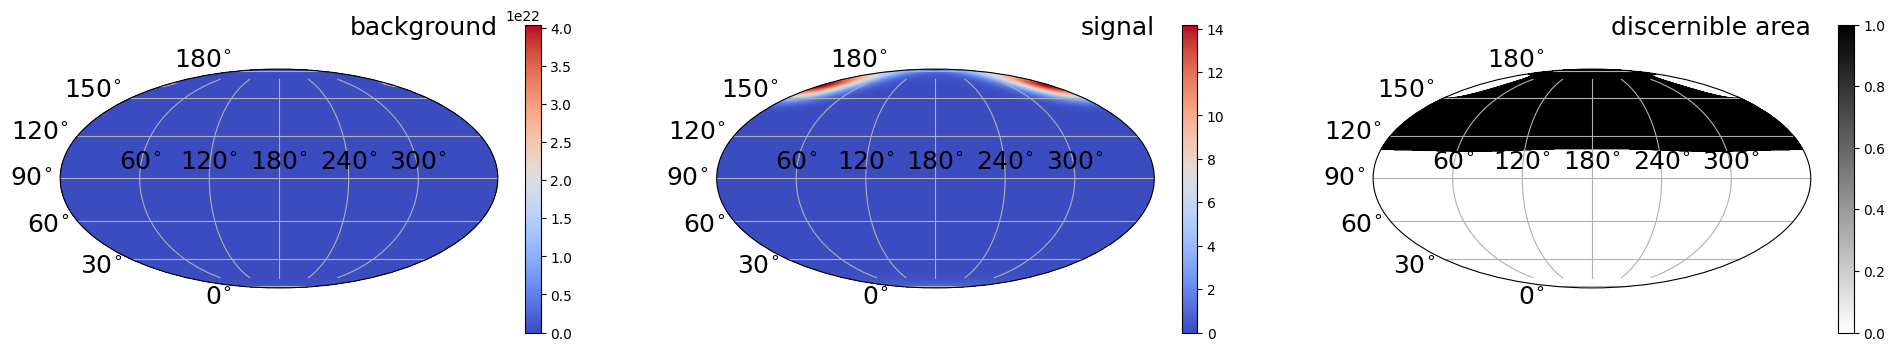

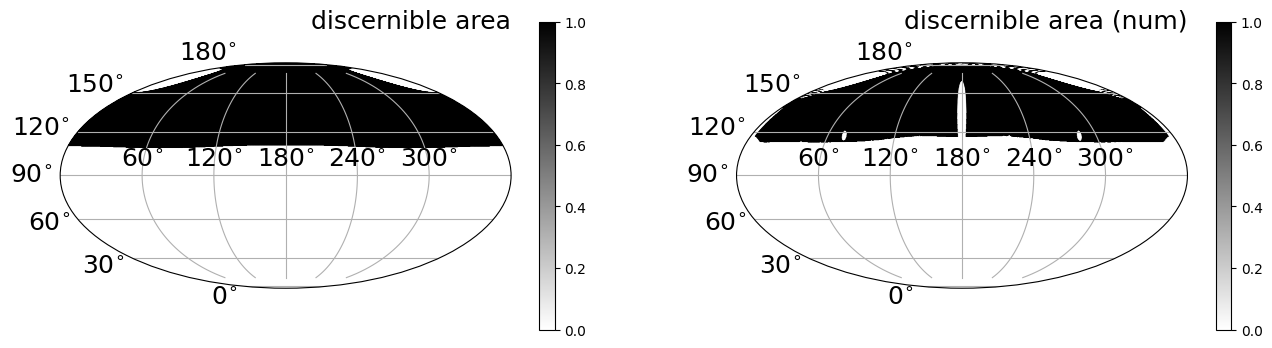

In [8]:
for idx,w0 in enumerate(w0_arr):
    print(f'====================== w0 = {w0} =============================')
    folder = f'runs/gridscan/CCS_w0/laser_1_w0/w0_{w0}'
    post_data = np.load(f'{folder}/postprocess_data.npz')

    phi = post_data['phi']
    theta = post_data['theta']
    N_angular = post_data['N_angular']
    background = post_data['background']
    discernible_area = post_data['discernible_area']
    N_total = post_data['N_total']
    N_disc = post_data['N_disc']
    N_total_arr[idx] = N_total
    N_disc_arr[idx] = N_disc

    plot_data = [background, N_angular, discernible_area]
    titles = ['background', 'signal', 'discernible area']

    print(f'N total: {N_total}')
    print(f'N disc: {N_disc}')

    ini_file = f'{folder}/vacem.ini'
    laser_diagnostics = laser_test(ini_file)
    energy = laser_diagnostics.energy()
    print(f'Energy: {energy}')
    
    background_num = laser_diagnostics.photon_number_density()
    discernible_area_num = get_discernible_area(background_num.matrix, N_angular, theta)
    N_disc_num = get_discernible_signal(background_num.matrix, N_angular,
                                        theta, phi)
    N_disc_num_arr[idx] = N_disc_num
    
    fig = plt.figure(figsize=(24,8))
    for i, (data, title) in enumerate(zip(plot_data, titles)):
        cmap = 'binary' if i == 2 else 'coolwarm'
        ax = fig.add_subplot(1,3,i+1, projection='mollweide')
        plot_mollweide(fig, ax, phi, theta,
                       data, cmap=cmap)
        plt.title(title, fontsize=18, loc='right', pad=25)
    plt.show()
    
    fig = plt.figure(figsize=(16,8))
    for i, (data,title) in enumerate(zip([discernible_area, discernible_area_num],
                                     ['discernible area', 'discernible area (num)'])):
        ax = fig.add_subplot(1,2,i+1, projection='mollweide')
        plot_mollweide(fig, ax, phi, theta, data,
                       cmap='binary')
        plt.title(title, fontsize=18, loc='right', pad=25)
    plt.show()

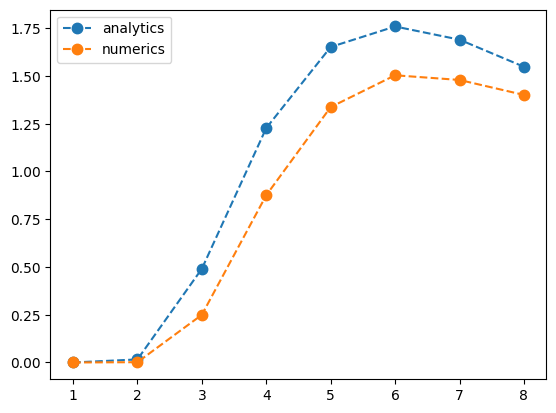

In [9]:
plt.figure()
plt.plot(w0_arr, N_disc_arr, '.--', ms=15, label='analytics')
plt.plot(w0_arr, N_disc_num_arr, '.--', ms=15, label='numerics')
plt.legend()
plt.show()

/tmp/ipykernel_936614/1949276396.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(w0_arr, N_disc_num_arr/N_disc_arr, '.--', ms=15)


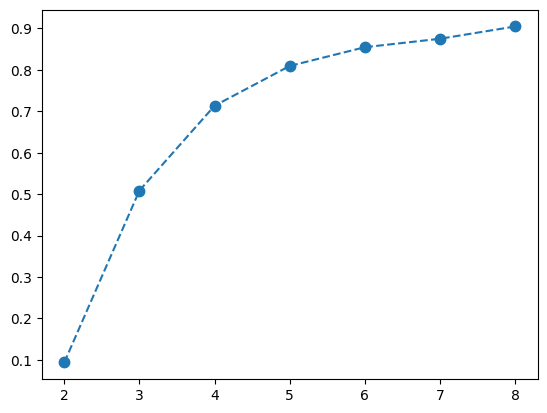

In [10]:
plt.plot(w0_arr, N_disc_num_arr/N_disc_arr, '.--', ms=15)